By the end of this session, you will be able to:

- Identify potential applications of optimization in daily life and in future career. (Model)
- Identify the decision variables, constraints, and objective of an optimization problem. (Model)
- Describe the trade-offs in an optimization problem. (Analyze)
- Read mathematical notations for optimization. (Communicate)
- Describe the following concepts: enumeration, gradient descent, local optimum, global optimum. (Analyze)

# Applications of Optimization
Optimization is the act of finding the best solution amid many possible options. It can be applied whenever 
1. one has a clear criteria for evaluating what is a good solution and 
2. one can clearly define the set of possible solutions to consider. 

The following steps are necessary to to apply optimization to a given context.

1. Specify the **decision variables**, which are the set of parameters that characterize a possible decision. There might be multiple choices of decision variables for a given context, and each choice corresponds to a different optimization problem. For example, if the context is inventory management in a retail store, one can consider the single decision variable of how many items of a certain product to hold in stock, holding fixed other decisions. This is a single-dimensional optimization problem. Alternatively, one can let the decision variables be the inventory level of all products, and study this larger optimization problem. This is a mult-dimensional optimization problem, because there is a decision variable corresponding to each product.
2. Specify the **objective**, which specifies how to evaluate one possible decision against another. Often, this is represented in the form of an *objective function*, which maps each possible decision to a number, representing the "goodness" of the decision. In the inventory example, one possible objective is to minimize the probability of stocking out a certain product. Another objective is to maximize store profit. Each objective leads to a different optimal solution: if one cares only not to stock out, then one would stock as many item of the product as possible; if one cares about profit, then one might choose to stock fewer items of products that take up a lot of space but have low profit margins.
3. Specify the **domain**, which is the set of possible values of decision variables to consider. For example, in the optimization problem that considers only the inventory level of one product, the domain might be $\{100,200,300\}$, meaning that one only wants to choose between these three inventory levels. A larger domain would be to consider every multiple of one hundred not more than ten thousand, $\{0, 100, \cdots, 9900, 10000\}$. When the domain contains many elements, it is usually more convenient to specify it in terms of a list of **constraints**. For example the last example can be specified by the two constraints:
 1. Inventory level $x$ satisfies $0 \le x \le 1000$ and
 2. Inventory level $x$ is a multiple of 100. 
 
When one formulates an optimization problem, it is useful to first qualitatively analyze the problem by stating the main **tradeoffs**, which describes conflicting ways in which changing the decision variable affects the objective. For example, in the single-item inventory optimization example, one tradeoff is that the larger the inventory level, the lower the chance of stocking out, which is good for revenue as it reduces lost sales; however, the larger the inventory level, the higher the holding cost required to store the inventory. The optimal choice finds the best balance between lost sales and holding cost. In the multiple-item inventory example, there is the additional tradeoff that increasing the inventory level for one item may require decreasing the inventory level of another. The optimal choice depends on which item is more important for revenue and the relative holding cost between the items. The trade-off analysis is by nature imprecise but is useful in communicating an optimization analyses to people with the lay person.

**Exercise 1**: Identify a decision you need to make in your life this semester, and frame it as an optimization problem by identifying the decision variables, the constraints, and a possible objective. Describe the some of the trade-offs.

**Exercise 2**: Choose a potential future job you aspire to and identify a decision someone in that job might face. Repeat the above exercise and frame the decision as an optmization problem.

# Mathematical Notation
In order to communicate with quantitative professionals, one must learn to "speak" the language of mathematics. Therefore it is important for you to be accustomed to common mathematical notation associated with optimization. Certain notation may seem abstract and enigmatic, but over time you will come to appreciate its ability to communicate in a precise and concise way. 

Let the variable $x$ represent all of the decision variables. Note that a mathematical variable $x$ is not restricted to representing a single number, but may represent multiple numbers and even non-numerical parameters. When $x$ corresponds to multiple numbers, one may use subscripts to denote one of the numbers. For example, if $x$ corresponds to the inventory level of every item in a store, then $x_i$ may denote the number of items to hold in stock of item $i$. For example $x_1=5$ and $x_2=10$ may denote holding 5 units of item 1 and 10 units of item 2. Note that indices are in principle not restricted to be numbers, so it makes to write $x_{\text{Gap XL T-shirt}}=4$, and $x_{\text{Ann Taylor blouse style A}}=10$. However, using longer text to be indices may be cumbersome. (Mathematical language is all about short hands.)

Let the set $X$ represent the domain, which is the set of possible values of decision variables to consider. In the single-item inventory context, we previously used the examples with $X=\{100,200,300\}$, and $X=\{0,100,\cdots,9900,10000\}$. The set notation $\{ \cdots \}$ lists the elements in the domain, where each element is a possible choice of the number of units of the product to order. The constraint that the decision variable must be in this set $X$ is denoted by $x \in X$. For example, if $X=\{100,200,300\}$, then $100$ is in this set, so $100 \in X$, but 500 is not, so $500 \not\in X$. A value for the decision variable $x$ within the domain $X$ is called a **feasible solution**. If the decision variable is not within the domain, it is said to be **infeasible** for the optimization problem.

Let $f(x)$ be an objective function mapping each element in the domain $X$ to a number. (The mathematical way of communicating the previous sentence is $f: X \to \mathbb{R}$. This means that for every element in $x$, f(x) is defined to be a real number.) For example, if the domain is $X=\{0,100,\cdots,1000\}$, and $f$ corresponds to the profit of the retail store when holding this many units of the item, given certain assumptions on customer demand and holding costs, $f$ might be as given by $f(x) = 2\sqrt{x}-x/20$, which has the following graph. (Ignore the Python code for now, you will learn to read and write such code soon enough.)




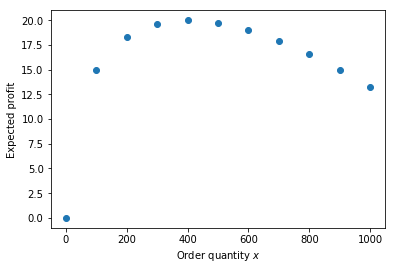

In [1]:
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0,1001,100)
f=lambda x: 2*np.sqrt(x)-x/20
plt.plot(x,f(x),'o')
plt.xlabel('Order quantity $x$')
plt.ylabel('Expected profit $f(x)$')
plt.show()

As can be seen, the order quantity $x$ that yields the maximal profit is $x=400$. The maximal profit attained is $f(400)=20$. 

Having introduced the abstract notation for decision variable $x$, domain $X$ and objective function $f(\cdot)$, the optimization problem of finding an largest possible objective is represented as

$$ \max_{x \in X} f(x).$$

In the above example with $X=\{0,100,\cdots,1000\}$, and, $f(x) = 2\sqrt{x}-x/20$, we write $\max_{x \in X} f(x) = 20$, which is the optimal objective value. The set of optimal solutions $x$ is represented as 

$$ \arg\max_{x \in X} f(x).$$

In the above example, the only optimal solution is $x=400$, so $\arg\max_{x \in X} f(x) = \{400\}.$ Note that the operator $\max$ yields a single number, the optimal objective, while the operator $\arg\max$ yields a set, which is the collection of values of the decision variables that attain the optimal objective.

Note that if we want to minimize an objective function, we will replace $\max$ with $\min$ and $\arg\max$ with $\arg\min$.

**Exercise 3**: Describe the optimization problems formulated in the previous two exercises using mathematical notation, and describe what is the decision variable $x$, what is the domain $X$ and what is the objective function $f$.

# Solving an Optimization Problem
The following methods can be used to solve simple optimization problems.

- **Enumeration**: Go through every single possibility one by one and find the best option. This can also be called the *brute force* method. When the number of possible solutions in the domain is large, this can be a time consuming process.
- **Local Improvements**: Start from an initial feasible solution, and compare it with "nearby" alternatives. The precise definition of "nearby" depends on the context. (In the above inventory management example, two inventory levels are nearby if they are within 100 of each other.) If one of the nearby solutions is better, then we move to that one and check its nearby solutions. If we find a solution that is better than all its neighbors, then we call it a **local optimum**. (If the objective is to minimize, we call it a **local minimum**; in a maximization problem, we call it a **local maximum**.) A solution that is best overall (not only best when compared to neighbors) is called a **global optimum**. In the graph above, $x=400$ is a local maximum and also a global maximum. Moreover, $x=0$ and $x=1000$ are both local minima, but only $x=0$ is a global minimum. 
 - One variant of the local improvements idea when the objective function is called **gradient descent**. (This is for minimization problems; when the objective is to maximize, then technically we should call it gradient ascent, although the name "gradient descent" is more common.) Intuitively, this uses the slope of the objective function to determine which neighbor to consider. In the graph example above, if we want to maximize, then we move to the right if the function is sloping up and move to the left if the function is sloping down. The word "gradient" is the analog of slope when there are many dimensions. 

When the objective function and domain satisfy certain special properties, there are specialized algorithms that can be applied. We will cover those when we study linear optimization, mixed integer optimization and convex optimization in the second half of the course.

**Exercise 4**: Visually identify all of the local and global maximum and minimum in the following function, with domain being every number between 0 and 100 inclusive. (This is written as $X=[0,100]$.)



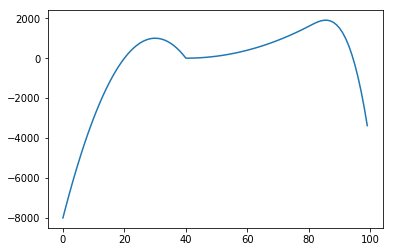

In [11]:
X=np.arange(0,100)
def f(x):
    if x<40:
        return 1000-10*(x-30)**2
    else:
        return (x-40)**2-max(0,(x-80))**3
y=[f(x) for x in X]
plt.plot(X,y)
plt.show()
